In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
data = pd.read_csv('training.csv')
testdata = pd.read_csv("test.csv")
sample_sub = pd.read_csv('sample_submission.csv')

In [12]:
data.sample(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
6396,TransactionId_126114,BatchId_10703,AccountId_4841,SubscriptionId_3829,CustomerId_3022,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-2000.0,2000,2018-11-23T10:20:15Z,2,0
48212,TransactionId_139275,BatchId_30883,AccountId_3636,SubscriptionId_3125,CustomerId_4075,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,500000.0,500000,2019-01-01T06:39:50Z,2,1
7432,TransactionId_127807,BatchId_68135,AccountId_335,SubscriptionId_3204,CustomerId_665,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-24T11:55:59Z,2,0
8015,TransactionId_81013,BatchId_94889,AccountId_1327,SubscriptionId_4463,CustomerId_1690,UGX,256,ProviderId_5,ProductId_1,airtime,ChannelId_3,1000.0,1000,2018-11-25T09:45:04Z,4,0
19414,TransactionId_117496,BatchId_19118,AccountId_3336,SubscriptionId_4592,CustomerId_3767,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2018-12-07T12:23:55Z,2,0


In [4]:
data.shape

(95662, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
TransactionId           95662 non-null object
BatchId                 95662 non-null object
AccountId               95662 non-null object
SubscriptionId          95662 non-null object
CustomerId              95662 non-null object
CurrencyCode            95662 non-null object
CountryCode             95662 non-null int64
ProviderId              95662 non-null object
ProductId               95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
Value                   95662 non-null int64
TransactionStartTime    95662 non-null object
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 11.7+ MB


In [67]:
cols_to_drop = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId','CurrencyCode','CountryCode','ProductId','Value']
data.drop(cols_to_drop,axis=1,inplace=True)

In [21]:
data.head()

,ProviderId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult
0,ProviderId_6,airtime,ChannelId_3,1000.0,2018-11-15T02:18:49Z,2,0
1,ProviderId_4,financial_services,ChannelId_2,-20.0,2018-11-15T02:19:08Z,2,0
2,ProviderId_6,airtime,ChannelId_3,500.0,2018-11-15T02:44:21Z,2,0
3,ProviderId_1,utility_bill,ChannelId_3,20000.0,2018-11-15T03:32:55Z,2,0
4,ProviderId_4,financial_services,ChannelId_2,-644.0,2018-11-15T03:34:21Z,2,0


In [32]:
testdata.sample(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
19516,TransactionId_82461,BatchId_14234,AccountId_4841,SubscriptionId_3829,CustomerId_5158,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-75.0,75,2019-02-25T09:40:32Z,2
16955,TransactionId_53491,BatchId_82520,AccountId_4781,SubscriptionId_3370,CustomerId_5250,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,5000.0,5000,2019-02-22T20:04:08Z,2
40127,TransactionId_14072,BatchId_12891,AccountId_4841,SubscriptionId_3829,CustomerId_1175,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-50.0,50,2019-03-10T10:39:39Z,2
14310,TransactionId_36110,BatchId_64972,AccountId_4154,SubscriptionId_1226,CustomerId_4606,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-02-22T07:24:05Z,2
4976,TransactionId_127309,BatchId_138502,AccountId_3128,SubscriptionId_4011,CustomerId_4910,UGX,256,ProviderId_4,ProductId_26,retail,ChannelId_5,-342000.0,342000,2019-02-15T11:51:21Z,2


In [68]:
testdata.drop(cols_to_drop,axis=1,inplace=True)

In [34]:
testdata.head()

,ProviderId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy
0,ProviderId_5,airtime,ChannelId_3,1000.0,2019-02-13T10:01:40Z,4
1,ProviderId_5,financial_services,ChannelId_3,2000.0,2019-02-13T10:02:12Z,2
2,ProviderId_4,financial_services,ChannelId_2,-50.0,2019-02-13T10:02:30Z,2
3,ProviderId_5,airtime,ChannelId_3,3000.0,2019-02-13T10:02:38Z,4
4,ProviderId_4,financial_services,ChannelId_2,-60.0,2019-02-13T10:02:58Z,2


In [35]:
data.shape

(95662, 7)

In [36]:
testdata.shape

(45019, 6)

In [37]:
data.describe()

,Amount,PricingStrategy,FraudResult
count,9.566200e+04,95662.000000,95662.000000
mean,6.717846e+03,2.255974,0.002018
std,1.233068e+05,0.732924,0.044872
min,-1.000000e+06,0.000000,0.000000
25%,-5.000000e+01,2.000000,0.000000
50%,1.000000e+03,2.000000,0.000000
75%,2.800000e+03,2.000000,0.000000
max,9.880000e+06,4.000000,1.000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 7 columns):
ProviderId              95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
TransactionStartTime    95662 non-null object
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 5.1+ MB


In [48]:
data.head()

,ProviderId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult
0,ProviderId_6,airtime,ChannelId_3,1000.0,2018-11-15T02:18:49Z,2,0
1,ProviderId_4,financial_services,ChannelId_2,-20.0,2018-11-15T02:19:08Z,2,0
2,ProviderId_6,airtime,ChannelId_3,500.0,2018-11-15T02:44:21Z,2,0
3,ProviderId_1,utility_bill,ChannelId_3,20000.0,2018-11-15T03:32:55Z,2,0
4,ProviderId_4,financial_services,ChannelId_2,-644.0,2018-11-15T03:34:21Z,2,0


In [49]:
cat_cols = data.select_dtypes(exclude=['int64','float64']).columns

In [50]:
cat_cols = list(cat_cols)
cat_cols

['ProviderId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']

In [58]:
for col in cat_cols:
    print("Value count for {}".format(col))
    print(data[col].nunique())
    print("_"*38)

Value count for ProviderId
6
______________________________________
Value count for ProductCategory
9
______________________________________
Value count for ChannelId
4
______________________________________
Value count for TransactionStartTime
94556
______________________________________


In [69]:
#Convert time series column 

data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])
testdata['TransactionStartTime'] = pd.to_datetime(testdata['TransactionStartTime'])

In [70]:
#data['Day']  = data['TransactionStartTime'].dt.day
data['wk_day']  = data['TransactionStartTime'].dt.weekday_name
data['Minute']  = data['TransactionStartTime'].dt.minute
data['Hour']  = data['TransactionStartTime'].dt.hour
data['Month']  = data['TransactionStartTime'].dt.month
data['Year']  = data['TransactionStartTime'].dt.year

testdata['wk_day']  = testdata['TransactionStartTime'].dt.weekday_name
testdata['Minute']  = testdata['TransactionStartTime'].dt.minute
testdata['Hour']  = testdata['TransactionStartTime'].dt.hour
testdata['Month']  = testdata['TransactionStartTime'].dt.month
testdata['Year']  = testdata['TransactionStartTime'].dt.year

data.head()

,ProviderId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult,wk_day,Minute,Hour,Month,Year
0,ProviderId_6,airtime,ChannelId_3,1000.0,2018-11-15 02:18:49,2,0,Thursday,18,2,11,2018
1,ProviderId_4,financial_services,ChannelId_2,-20.0,2018-11-15 02:19:08,2,0,Thursday,19,2,11,2018
2,ProviderId_6,airtime,ChannelId_3,500.0,2018-11-15 02:44:21,2,0,Thursday,44,2,11,2018
3,ProviderId_1,utility_bill,ChannelId_3,20000.0,2018-11-15 03:32:55,2,0,Thursday,32,3,11,2018
4,ProviderId_4,financial_services,ChannelId_2,-644.0,2018-11-15 03:34:21,2,0,Thursday,34,3,11,2018


In [71]:
data.drop(columns='TransactionStartTime',axis=1,inplace=True)
testdata.drop(columns='TransactionStartTime',axis=1,inplace=True)

In [72]:
data.head()

,ProviderId,ProductCategory,ChannelId,Amount,PricingStrategy,FraudResult,wk_day,Minute,Hour,Month,Year
0,ProviderId_6,airtime,ChannelId_3,1000.0,2,0,Thursday,18,2,11,2018
1,ProviderId_4,financial_services,ChannelId_2,-20.0,2,0,Thursday,19,2,11,2018
2,ProviderId_6,airtime,ChannelId_3,500.0,2,0,Thursday,44,2,11,2018
3,ProviderId_1,utility_bill,ChannelId_3,20000.0,2,0,Thursday,32,3,11,2018
4,ProviderId_4,financial_services,ChannelId_2,-644.0,2,0,Thursday,34,3,11,2018


In [73]:
testdata.head()

,ProviderId,ProductCategory,ChannelId,Amount,PricingStrategy,wk_day,Minute,Hour,Month,Year
0,ProviderId_5,airtime,ChannelId_3,1000.0,4,Wednesday,1,10,2,2019
1,ProviderId_5,financial_services,ChannelId_3,2000.0,2,Wednesday,2,10,2,2019
2,ProviderId_4,financial_services,ChannelId_2,-50.0,2,Wednesday,2,10,2,2019
3,ProviderId_5,airtime,ChannelId_3,3000.0,4,Wednesday,2,10,2,2019
4,ProviderId_4,financial_services,ChannelId_2,-60.0,2,Wednesday,2,10,2,2019


In [74]:
data.dtypes

ProviderId          object
ProductCategory     object
ChannelId           object
Amount             float64
PricingStrategy      int64
FraudResult          int64
wk_day              object
Minute               int64
Hour                 int64
Month                int64
Year                 int64
dtype: object

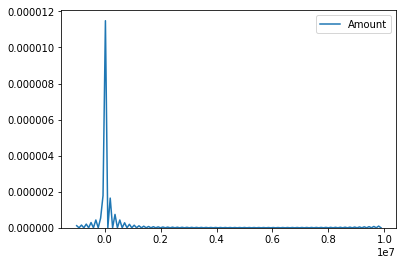

In [75]:
sns.kdeplot(data['Amount'])

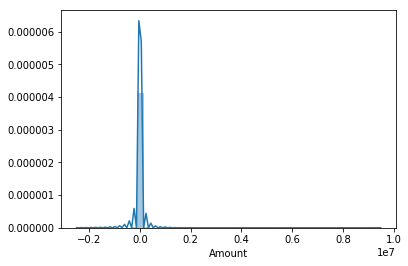

In [76]:
sns.distplot(testdata['Amount'])

In [83]:
#Log1p helps us transform our data from been Left_skewed to a Normal data

data["Amount"] = np.log1p(data["Amount"])
testdata["Amount"] = np.log1p(testdata["Amount"])

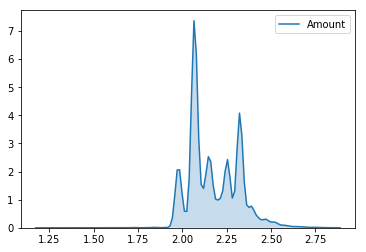

In [84]:
sns.kdeplot(data['Amount'],shade=True)

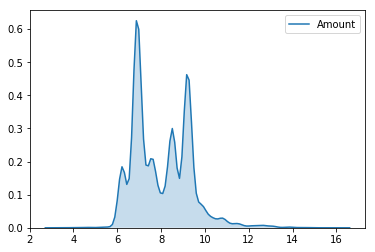

In [82]:
sns.kdeplot(testdata['Amount'],shade=True)

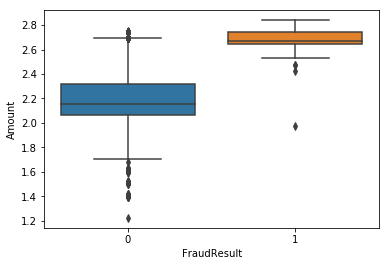

In [85]:
sns.boxplot(x='FraudResult', y='Amount', data=data)

In [88]:
data.isnull().sum()

ProviderId             0
ProductCategory        0
ChannelId              0
Amount             38189
PricingStrategy        0
FraudResult            0
wk_day                 0
Minute                 0
Hour                   0
Month                  0
Year                   0
dtype: int64

In [90]:
data['Amount'].mean()

2.174068418859747

In [91]:
#How to treat misssing values in a dataset
data["Amount"].fillna((data["Amount"].mean()), inplace=True)

In [92]:
data.isnull().sum()

ProviderId         0
ProductCategory    0
ChannelId          0
Amount             0
PricingStrategy    0
FraudResult        0
wk_day             0
Minute             0
Hour               0
Month              0
Year               0
dtype: int64

In [93]:
testdata.isnull().sum()

ProviderId             0
ProductCategory        0
ChannelId              0
Amount             18254
PricingStrategy        0
wk_day                 0
Minute                 0
Hour                   0
Month                  0
Year                   0
dtype: int64

In [95]:
testdata['Amount'].mean()

2.190372763649749

In [96]:
testdata['Amount'].fillna((testdata['Amount'].mean()),inplace=True)

In [97]:
testdata.isnull().sum()

ProviderId         0
ProductCategory    0
ChannelId          0
Amount             0
PricingStrategy    0
wk_day             0
Minute             0
Hour               0
Month              0
Year               0
dtype: int64

In [98]:
all_data = pd.concat([data, testdata])

In [99]:
all_data.head()

,Amount,ChannelId,FraudResult,Hour,Minute,Month,PricingStrategy,ProductCategory,ProviderId,Year,wk_day
0,2.067970,ChannelId_3,0.0,2,18,11,2,airtime,ProviderId_6,2018,Thursday
1,2.174068,ChannelId_2,0.0,2,19,11,2,financial_services,ProviderId_4,2018,Thursday
2,1.976385,ChannelId_3,0.0,2,44,11,2,airtime,ProviderId_6,2018,Thursday
3,2.389087,ChannelId_3,0.0,3,32,11,2,utility_bill,ProviderId_1,2018,Thursday
4,2.174068,ChannelId_2,0.0,3,34,11,2,financial_services,ProviderId_4,2018,Thursday


In [105]:
#Next thing is we transform nominal values to numerical values through an encoding scheme called LabelEnccoder



In [103]:
cat_cols = all_data.select_dtypes(exclude=['int64','float64']).columns

In [104]:
cat_cols = list(cat_cols)
cat_cols

['ChannelId', 'ProductCategory', 'ProviderId', 'wk_day']

In [106]:
from sklearn.preprocessing import LabelEncoder

In [116]:
lb = LabelEncoder()

for col in cat_cols:
    lb.fit(all_data[col])
    all_data[col] = lb.transform(all_data[col])

In [117]:
all_data.sample(5)

,Amount,ChannelId,FraudResult,Hour,Minute,Month,PricingStrategy,ProductCategory,ProviderId,Year,wk_day
88216,2.229401,2,0.0,19,7,2,2,2,4,2019,4
14240,2.174068,1,0.0,19,48,12,2,2,3,2018,1
32799,2.323411,2,0.0,13,37,12,2,0,5,2018,6
67150,2.067970,2,0.0,15,10,1,2,0,5,2019,1
44863,2.249786,2,NaN,21,46,3,2,2,4,2019,4


In [118]:
all_data.shape

(140681, 11)

In [120]:
#Slice the data concatenated to split them as ur test and train set
train = all_data[0:95662]
test = all_data[95662:]

In [121]:
test.drop(columns='FraudResult', inplace=True)

In [122]:
X = train.loc[:, train.columns != 'FraudResult']
y = train.loc[:, train.columns == 'FraudResult']

In [123]:
X.head()

,Amount,ChannelId,Hour,Minute,Month,PricingStrategy,ProductCategory,ProviderId,Year,wk_day
0,2.067970,2,2,18,11,2,0,5,2018,4
1,2.174068,1,2,19,11,2,2,3,2018,4
2,1.976385,2,2,44,11,2,0,5,2018,4
3,2.389087,2,3,32,11,2,9,0,2018,4
4,2.174068,1,3,34,11,2,2,3,2018,4


In [124]:
X.shape

(95662, 10)

In [125]:
y.shape

(95662, 1)

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
sc = StandardScaler()
X = sc.fit_transform(X)
test = sc.transform(test)

In [128]:
from sklearn.model_selection import train_test_split

In [161]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.22, random_state = 1)

In [162]:
from sklearn.metrics import f1_score

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [164]:
Dc_model = DecisionTreeClassifier(random_state=1)
Dc_model.fit(X_train,y_train)
Dc_pred = Dc_model.predict(X_test)

In [165]:
f1_score(Dc_pred, y_test)

0.8139534883720929

In [166]:
Rf = RandomForestClassifier(n_estimators=600,random_state=1,max_depth=6)
Rf.fit(X_train,y_train)
Rf_pred = Rf.predict(X_test)

In [167]:
f1_score(Rf_pred, y_test)

0.8333333333333334

In [168]:
xgb= XGBClassifier(random_state=1,n_estimators=600,max_depth=6,learning_rate=0.3,gamma=0.2)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
f1_score(xgb_pred, y_test)

0.8863636363636365